In [ ]:
import os
import pandas as pd
import sevenbridges as sbg
from ggplot import *

In [2]:
token = os.environ['CAVATICA_ZYK_TOKEN']
url = 'https://cavatica-api.sbgenomics.com/v2/'
pilot = 'yuankun/kf-genomics-harmonization-pilot'
broad = 'yuankun/kf-genomics-harmonization-pilot-broad'
washu = 'yuankun/kf-genomics-harmonization-pilot-washu'
data = {}

In [3]:
api = sbg.Api(url=url, token=token)

In [4]:
broad_task = api.tasks.get(id='69e0993b-742d-4c33-b791-427c38d649ee')

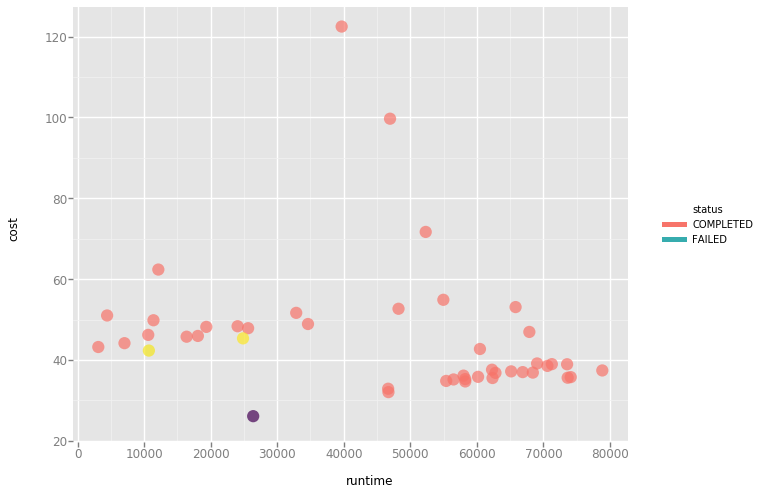

<ggplot: (278096845)>

In [5]:
for child in broad_task.get_batch_children():
    job = child.get_execution_details()
    try:
        runtime = (job.end_time-job.start_time).seconds
        data[child.name] = {
            'runtime': runtime,
            'cost': child.price.amount,
            'status': job.status
        }
    except:
        continue

df = pd.DataFrame.from_dict(data, orient='index')

ggplot(aes(x='runtime', y='cost', color='status'), data=df) +\
    geom_point(size=150, alpha=.7)

In [6]:
df

,status,runtime,cost
alignment-pilot-rios2016: file: SL248401.bam,COMPLETED,69058,39.14
alignment-pilot-rios2016: file: SL248402.bam,COMPLETED,4445,51.01
alignment-pilot-rios2016: file: SL248404.bam,COMPLETED,48233,52.67
alignment-pilot-rios2016: file: SL248407.bam,COMPLETED,34630,48.90
alignment-pilot-rios2016: file: SL248410.bam,FAILED,26395,26.10
alignment-pilot-rios2016: file: SL248423.bam,COMPLETED,74109,35.76
alignment-pilot-rios2016: file: SL248424.bam,COMPLETED,39689,122.49
alignment-pilot-rios2016: file: SL248425.bam,COMPLETED,58261,35.27
alignment-pilot-rios2016: file: SL248437.bam,COMPLETED,65161,37.18
alignment-pilot-rios2016: file: SL248441.bam,COMPLETED,46719,32.05


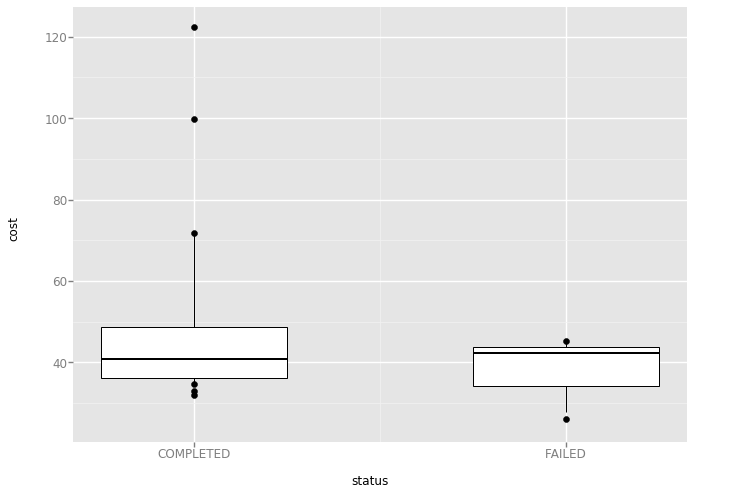

<ggplot: (289004681)>

In [14]:
ggplot(aes(x='status', y='cost'), data=df) +\
    geom_boxplot(size=150, alpha=.7)